In [16]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py

'''
This is a cell to plot an interactive chart of BTC price data using plotly
'''

df = pd.read_csv("./data/price_data/BTC_price.csv")


df.head()
trace_btc = go.Scatter(
    x=df.time,
    y=df['close'],
    name = "BTC price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

data = [trace_btc]

layout = dict(
    title='BTC  Price Interactive Chart', 
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "BTC Price Interactive Chart")
plotly.offline.plot(fig, filename='./visualization/BTC_interactive_plot.html')

'./visualization/BTC_interactive_plot.html'

In [53]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py

'''
This is a cell to plot an interactive chart of forum sentiment using plotly
'''

df1 = pd.read_csv('./data/senti_analysis/transformer_sentiment/bitcoin_FTXtrans_sentiment.csv')
df2 = pd.read_csv('./data/senti_analysis/transformer_sentiment/cryptocurrency_FTXtrans_sentiment.csv')
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
start_date = dt.datetime(2022, 11, 1).timestamp()
end_date = dt.datetime(2022, 11, 23).timestamp()
print(start_date)
df1 = df1[df1['time'] >= start_date]
df1 = df1[df1['time'] <= end_date]
df1['time'] = df1['time'] //3600 * 3600
df1 = df1.groupby('time').mean()
df2 = df2[df2['time'] >= start_date]
df2 = df2[df2['time'] <= end_date]
df2['time'] = df2['time'] //3600 * 3600
df2 = df2.groupby('time').mean()

df = df1.merge(df2, on='time', suffixes=('_btc', '_crypto'))
df.index = pd.to_datetime(df.index, unit='s')

df.head()

1667286000.0


,roberta_neg_btc,roberta_neu_btc,roberta_pos_btc,compound_btc,label_btc,roberta_neg_crypto,roberta_neu_crypto,roberta_pos_crypto,compound_crypto,label_crypto
time,,,,,,,,,,
2022-11-06 13:00:00,0.757067,0.231383,0.011549,-0.973425,-1.0,0.312991,0.657306,0.029703,-0.815655,-1.000000
2022-11-07 01:00:00,0.804811,0.186313,0.008877,-0.979286,-1.0,0.210218,0.696133,0.093649,-0.308784,-0.333333
2022-11-07 15:00:00,0.034035,0.932690,0.033275,-0.472372,-1.0,0.265169,0.690703,0.044128,-0.760754,-1.000000
2022-11-07 16:00:00,0.496032,0.465678,0.038290,-0.890050,-1.0,0.247083,0.725577,0.027340,-0.808022,-1.000000
2022-11-08 13:00:00,0.181881,0.728594,0.089526,-0.580615,-1.0,0.172548,0.753584,0.073868,-0.618958,-1.000000


In [55]:

trace_btc = go.Scatter(
    x= df.index,
    y=df['compound_btc'],
    name = "BTC sentiment",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_e = go.Scatter(
    x= df.index,
    y=df['compound_crypto'],
    name = "crypto sentiment",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_btc, trace_e]

layout = dict(
    title='BTC & crypto sentiment Interactive Chart', 
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "BTC & crypto sentiment Interactive Chart")
plotly.offline.plot(fig, filename='./visualization/sentiment_interactive_plot.html')

'./visualization/sentiment_interactive_plot.html'

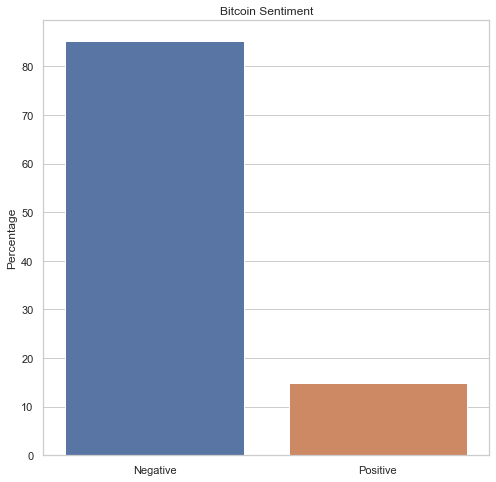

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('./data/senti_analysis/transformer_sentiment/bitcoin_FTXtrans_sentiment.csv')
counts = df.label.value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_title('Bitcoin Sentiment')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()


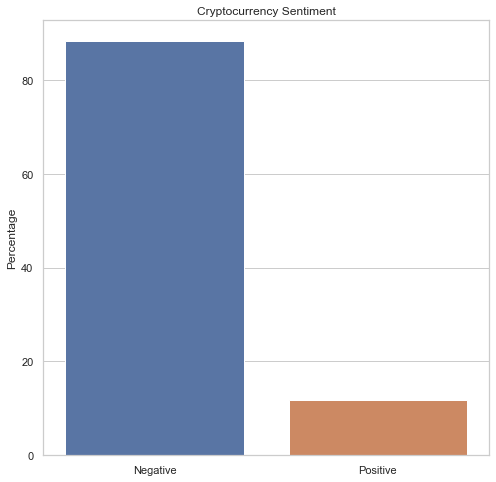

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('./data/senti_analysis/transformer_sentiment/cryptocurrency_FTXtrans_sentiment.csv')
counts = df.label.value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_title('Cryptocurrency Sentiment')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()